In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
data=pd.read_csv('/content/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.isnull().any()


CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [5]:
data.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [7]:
data.Gender=le.fit_transform(data.Gender)


{'whiskers': [<matplotlib.lines.Line2D at 0x7893f4a08d00>,
 'caps': [<matplotlib.lines.Line2D at 0x7893f4a09240>,
 'boxes': [<matplotlib.lines.Line2D at 0x7893f4a08a60>],
 'medians': [<matplotlib.lines.Line2D at 0x7893f4a09780>],
 'fliers': [<matplotlib.lines.Line2D at 0x7893f4a09a20>],
 'means': []}

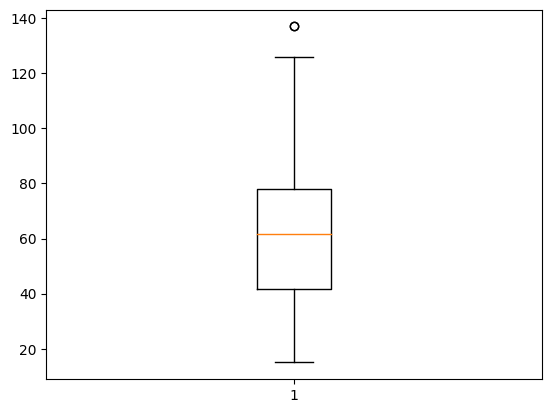

In [8]:
plt.boxplot(data['Annual Income (k$)'])


In [9]:

q1=data['Annual Income (k$)'].quantile(0.25)
q3=data['Annual Income (k$)'].quantile(0.75)
IQR=q3-q1

In [10]:

upper_limit=q3+1.5*IQR
upper_limit

132.75

In [11]:

lower_limit=q3-1.5*IQR
lower_limit

23.25

In [12]:
data.median()


CustomerID                100.5
Gender                      0.0
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [13]:
data['Annual Income (k$)'] = np.where(data['Annual Income (k$)']>upper_limit,61.5,data['Annual Income (k$)'])


<Axes: >

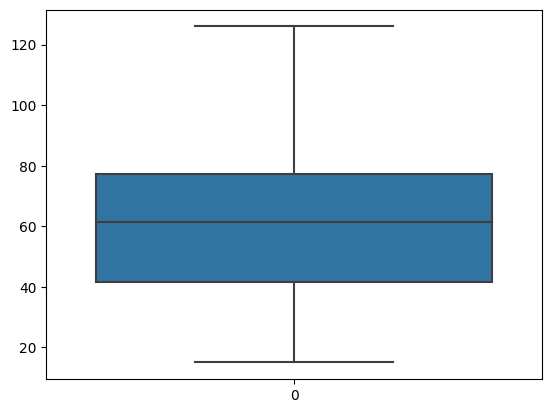

In [14]:
sns.boxplot(data['Annual Income (k$)'])


In [15]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    int64  
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      200 non-null    float64
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 7.9 KB


In [16]:
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


In [17]:
data.describe()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,59.805000,50.200000
std,57.879185,0.497633,13.969007,25.110699,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.250000,50.000000
75%,150.250000,1.000000,49.000000,77.250000,73.000000
max,200.000000,1.000000,70.000000,126.000000,99.000000


<Axes: >

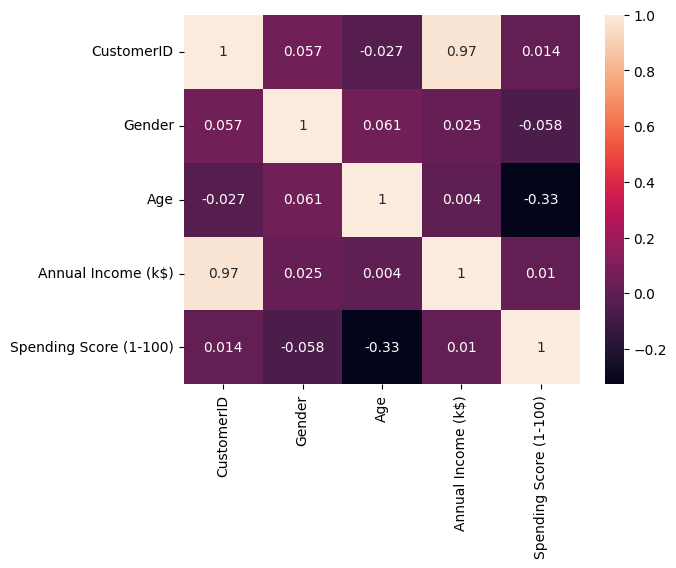

In [18]:
sns.heatmap(data.corr(),annot=True)


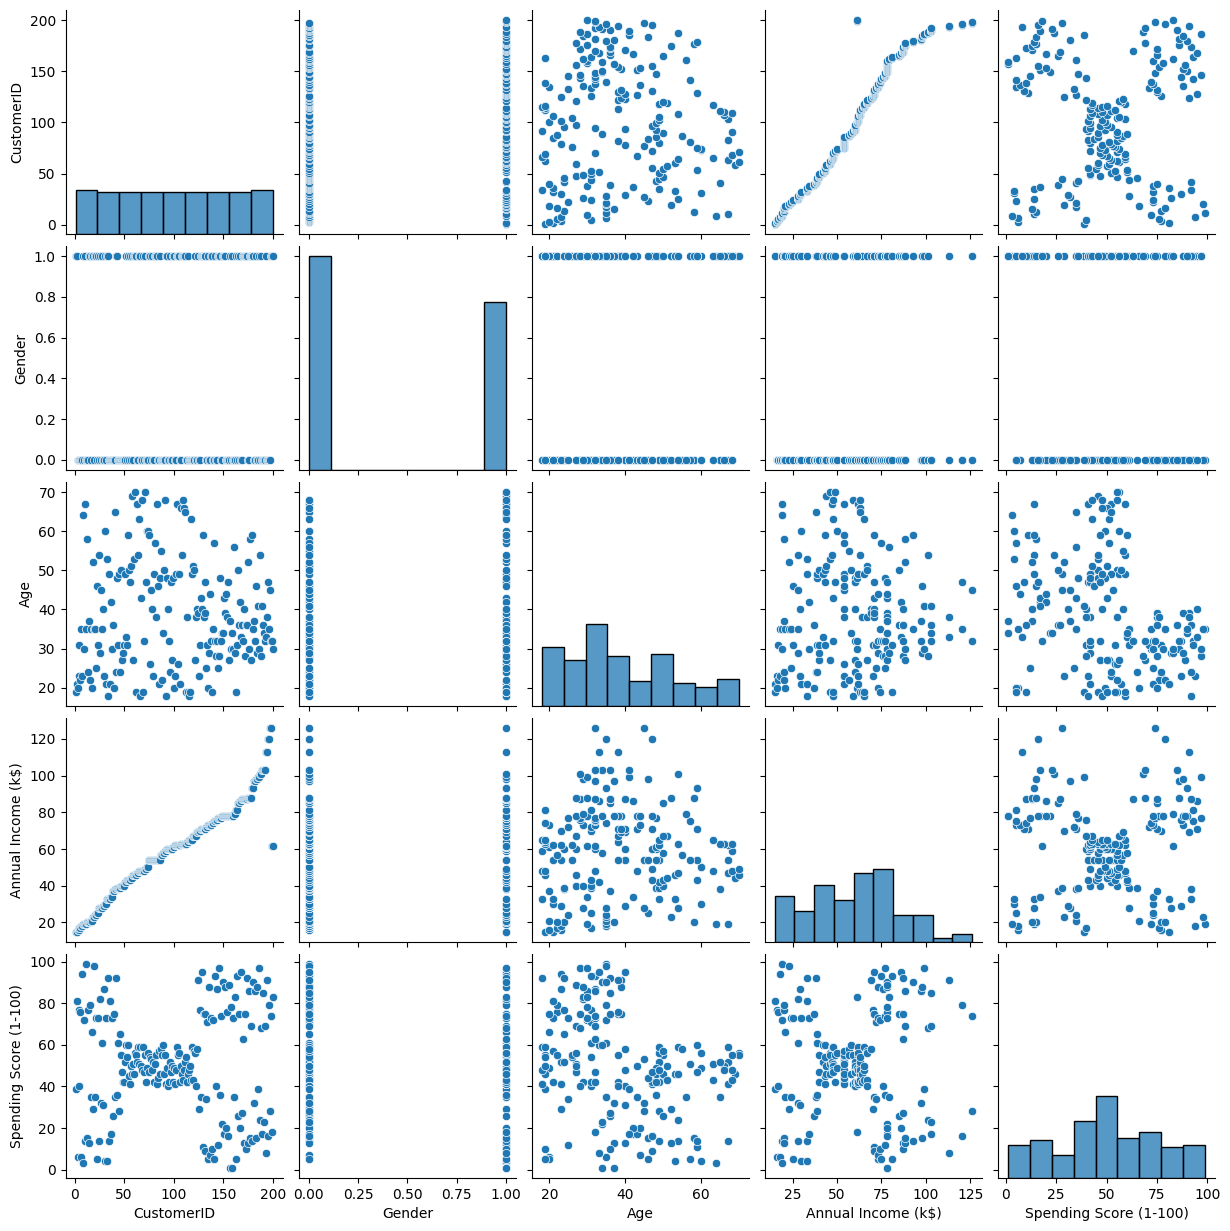

In [19]:
sns.pairplot(data)


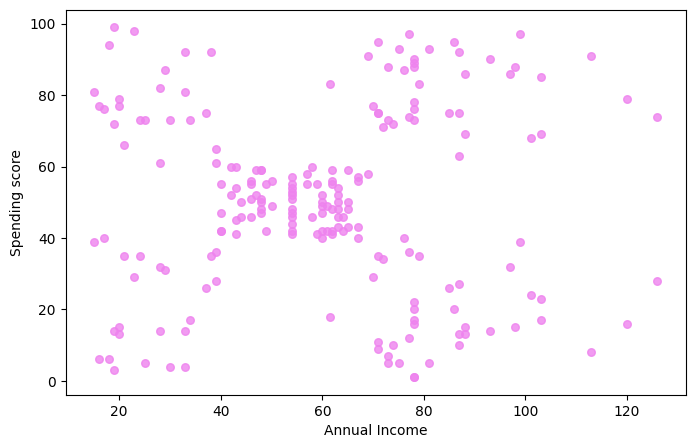

In [20]:

plt.figure(figsize=(8,5))
plt.scatter('Annual Income (k$)','Spending Score (1-100)',data=data, s=30, color="violet", alpha = 0.8)
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.show()

In [21]:

x=data.iloc[:,3:5]
x

,Annual Income (k$),Spending Score (1-100)
0,15.0,39
1,15.0,81
2,16.0,6
3,16.0,77
4,17.0,40
...,...,...
195,120.0,79
196,126.0,28
197,126.0,74
198,61.5,18


In [22]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)


from sklearn import cluster


error=[]
for i in range(1,11):
  kmeans = cluster.KMeans(n_clusters=i,init = 'k-means++',random_state=0)
  kmeans.fit(x_scaled)
  error.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [23]:
error


[399.9999999999999,
 267.65356271448735,
 158.25007683695733,
 108.2325796247875,
 63.138175098564076,
 53.94908917133441,
 44.875564685486296,
 36.78209414966159,
 32.010620188830046,
 28.996419911313236]

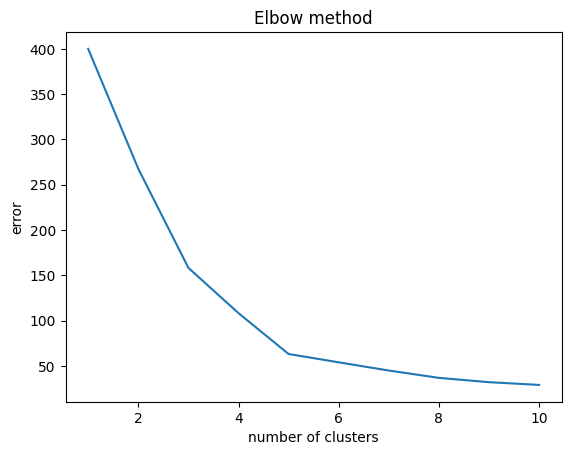

In [24]:

plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

KMean= KMeans(n_clusters=5)
KMean.fit(x_scaled)
label=KMean.predict(x_scaled)

print("Silhouette Score(n=5):",silhouette_score(x_scaled,label))

Silhouette Score(n=5): 0.5547180113417072


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:

print(KMean.labels_)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 1 0 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


In [27]:

km = KMeans(n_clusters = 5)
predicted = km.fit_predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])
predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 3,
       4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 3, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [28]:

data['Cluster'] = predicted
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15.0,39,4
1,2,1,21,15.0,81,0
2,3,0,20,16.0,6,4
3,4,0,23,16.0,77,0
4,5,0,31,17.0,40,4
...,...,...,...,...,...,...
195,196,0,35,120.0,79,2
196,197,0,45,126.0,28,1
197,198,1,32,126.0,74,2
198,199,1,32,61.5,18,1


In [29]:

km_model = cluster.KMeans(n_clusters=5,init = 'k-means++',random_state=0)


km_model.fit(x_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)